In [ ]:
# pip install pytesseract

In [1]:
import cv2
from pytesseract import image_to_data, Output

In [2]:
image_path = "/resources/datasets/image_recognition/sentencias/images_detected/1.png"
image = cv2.imread(image_path) 

In [ ]:
def get_token_boxes(image):
    data = image_to_data(
        image,
        lang='spa',
        output_type=Output.DICT,
    )
    
    data = zip(
        data["text"],
        data["conf"],
        data["left"],
        data["top"],
        data["width"],
        data["height"],
    )
    # box format =>  (x_left, y_top, x_right, y_bottom)
    token_boxes = map(
        lambda x: {
            "text": x[0],
            "confidence": float(x[1]) / 100,
            "top": x[3],
            "left": x[2],
            "box": (x[2], x[3], x[2] + x[4], x[3] + x[5]),
            "box_area": x[4] * x[5],
            "box_height": x[5],
            "x_position": x[2],
            "y_position": x[3],
        },
        data,
    )

    token_boxes = [token for token in token_boxes if token["text"]]

    return token_boxes

In [ ]:
tokens = get_token_boxes(image)

In [ ]:
tokens[0].keys()

In [3]:
d = image_to_data(
    image,
    lang='spa',
    output_type=Output.DICT,
)

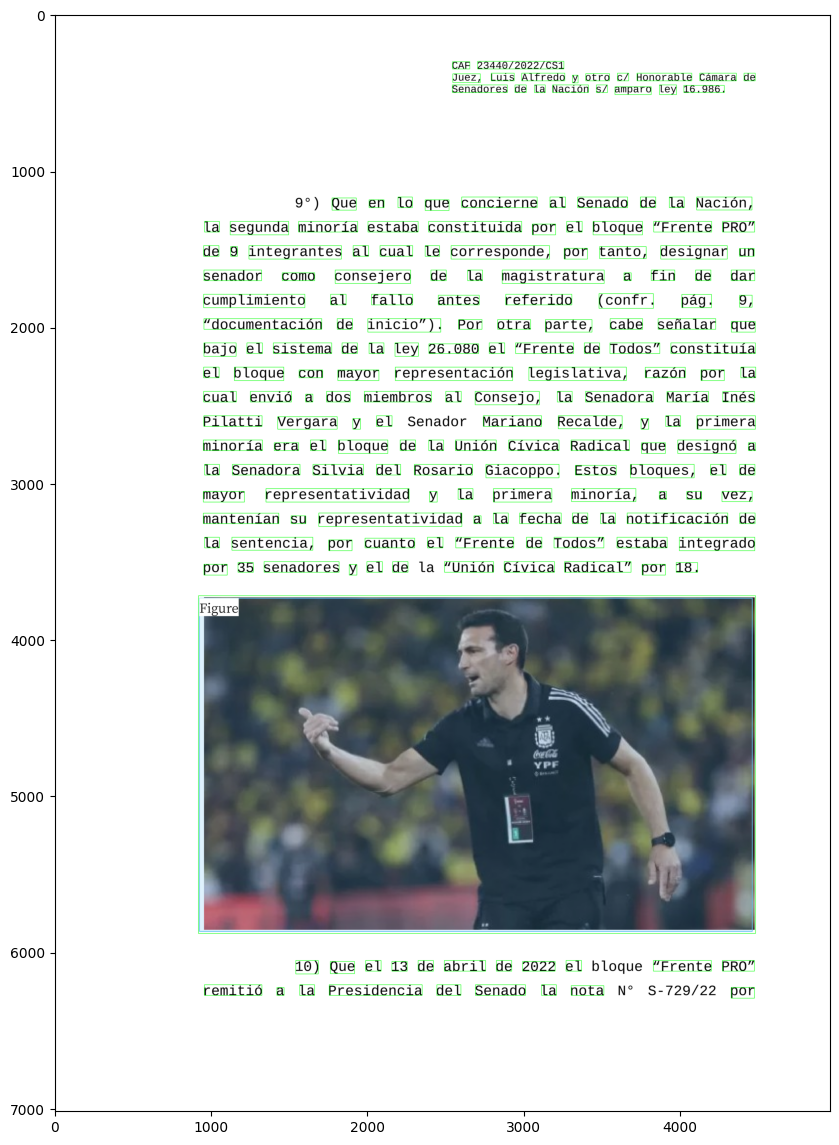

In [11]:
import matplotlib.pyplot as plt
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize=(10,40))
plt.imshow(img)